In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from pathlib import Path

_ = Path().resolve().parent.parent # Add [...]\MS960_MachineLearning\Projeto2 to PYTHONPATH
sys.path.insert(0, str(_))

from Projeto2.neural_network.neural import *
from Projeto2.neural_network.plots import *
from Projeto2.run import cfg

## READING DATA

In [13]:
data_folder = "../data/training/"
df_images   = pd.read_csv(data_folder+"images.csv", index_col=0)
df_labels   = pd.read_csv(data_folder+"labels.csv", index_col=0)

# res_folder  = "../data/best/"
# total_costs = pd.read_csv(res_folder+"costs.csv", index_col=0)
# thetas_12   = pd.read_csv(res_folder+"thetas_12.csv", index_col=0)
# thetas_23   = pd.read_csv(res_folder+"thetas_23.csv", index_col=0)

res_folder  = "../data/results/save_thetas/"
total_costs = pd.read_csv(res_folder+"cost_steps.csv", index_col=0)
thetas_12   = pd.read_csv(res_folder+"thetas_1_2.csv", index_col=0)
thetas_23   = pd.read_csv(res_folder+"thetas_2_3.csv", index_col=0)

In [14]:
df_labels.value_counts()

value
2        328
8        311
3        309
10       304
4        303
5        294
6        292
1        289
9        289
7        281
dtype: int64

In [15]:
df_images

,image_1,image_10,image_1000,image_1001,image_1002,image_1003,image_1004,image_1006,image_1009,image_1012,...,image_985,image_986,image_987,image_989,image_99,image_991,image_993,image_994,image_996,image_997
pixel_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel_399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Custo calculado em cada passo no treinamento')

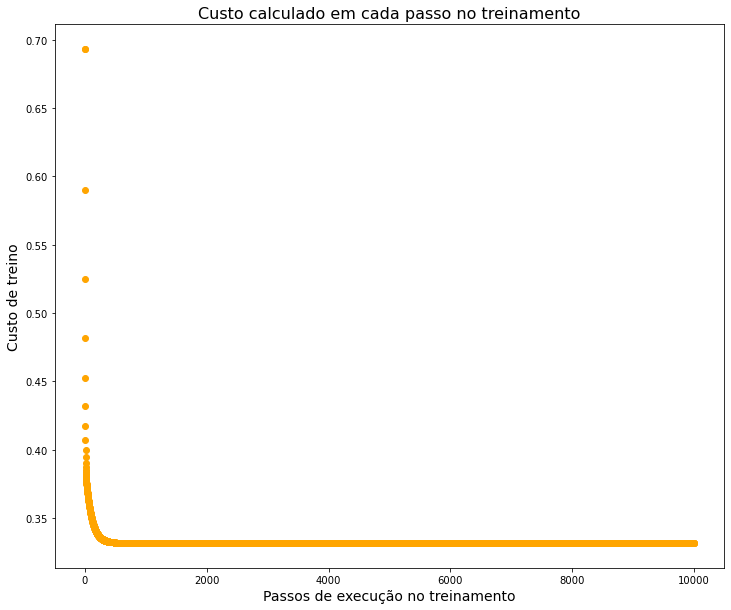

In [16]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter( [i for i in range(total_costs.loc['label_3'].shape[0])], total_costs.loc['label_8'] , color='orange') 
ax.set_xlabel("Passos de execução no treinamento", fontsize=14)
ax.set_ylabel("Custo de treino", fontsize=14)
ax.set_title("Custo calculado em cada passo no treinamento", fontsize=16)


## CALCULATE VALUES FOR DATA TEST

In [17]:
class_matrix = classification_matrix(df_labels, cfg.LABELS)

activations  = activation_layer(df_images, class_matrix, thetas=[thetas_12, thetas_23])

cost         = cost_function_sigmoid(activations, class_matrix, thetas=[thetas_12, thetas_23], lambda_value=cfg.LAMBDA_VALUE[0])

In [18]:
classification_labels = pd.DataFrame( activations[-1].idxmax(axis="index") , columns=['value'])

## CORRECT CLASSIFICATION

In [19]:
for i in range( classification_labels.shape[0] ):
    classification_labels.iloc[i] = int( classification_labels.iloc[i][0].split("label_")[1] )
correct_classification = 1*(classification_labels == df_labels)

correct_classification = pd.concat([correct_classification, df_labels, classification_labels], axis=1)
correct_classification.columns = ['correto', 'original', 'atribuido']

correct_classification

,correto,original,atribuido
image_1,0,10,2
image_10,0,10,2
image_1000,0,1,2
image_1001,1,2,2
image_1002,1,2,2
...,...,...,...
image_991,0,1,2
image_993,0,1,2
image_994,0,1,2
image_996,0,1,2


In [20]:
ratio = 100 * correct_classification['correto'].value_counts(normalize=True)
print(ratio)
print(f"\nCORRECTS = {round(ratio[1],2)}%")

0    89.066667
1    10.933333
Name: correto, dtype: float64

CORRECTS = 10.93%


In [21]:
cost

,cost
label_1,0.316951
label_2,0.345119
label_3,0.331625
label_4,0.327275
label_5,0.320666
label_6,0.319184
label_7,0.310940
label_8,0.333066
label_9,0.316951
label_10,0.328003


## CONVERT TO CSV

In [22]:
ratio.to_csv(f"../data/corrects/ratio.csv")
cost.to_csv(f"../data/corrects/cost.csv")
correct_classification.to_csv(f"../data/corrects/corrects.csv")